FAJAR ZULMI SOPIAN

In [2]:
#import library tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os

In [3]:
pip install split_folders

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-02 08:01:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.27MB/s    in 69s     

2021-05-02 08:03:07 (4.49 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [7]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output = '/tmp/rockpaperscissors/rps-cv-images', seed = 1337, ratio = (.6, .4))
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3060.12 files/s]


In [8]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors', 'train', 'val']

In [9]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/train')

['rock', 'paper', 'scissors']

In [10]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images/val')

['rock', 'paper', 'scissors']

In [11]:
# membuat direktori tangan berbentuk batu pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
 
# membuat direktori tangan berbentuk gunting pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')
 
# membuat direktori tangan berbentuk kertas pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
 
# membuat direktori tangan berbentuk batu pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
 
# membuat direktori tangan berbentuk gunting pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
 
# membuat direktori tangan berbentuk kertas pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [12]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # hahah aku gantii nih 
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 1.1462 - accuracy: 0.2800 - val_loss: 1.0969 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 6s - loss: 1.0823 - accuracy: 0.4300 - val_loss: 1.0587 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 1.0462 - accuracy: 0.5300 - val_loss: 1.1033 - val_accuracy: 0.3500
Epoch 4/20
25/25 - 6s - loss: 0.9827 - accuracy: 0.5700 - val_loss: 0.8258 - val_accuracy: 0.7000
Epoch 5/20
25/25 - 6s - loss: 0.9213 - accuracy: 0.6500 - val_loss: 1.0645 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 6s - loss: 0.9107 - accuracy: 0.5900 - val_loss: 0.9435 - val_accuracy: 0.4500
Epoch 7/20
25/25 - 6s - loss: 0.7139 - accuracy: 0.6400 - val_loss: 0.4547 - val_accuracy: 0.8500
Epoch 8/20
25/25 - 6s - loss: 0.6187 - accuracy: 0.7300 - val_loss: 0.5684 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 6s - loss: 0.6453 - accuracy: 0.7300 - val_loss: 0.5986 - val_accuracy: 0.7000
Epoch 10/20
25/25 - 6s - loss: 0.5821 - accuracy: 0.7700 - val_loss: 0.9213 - val_accuracy: 0.5500
Epoch 11/20
25/25 -

In [38]:
# Callback untuk otomatis berhenti di 98%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.98):
      print("\nAkurasi telah mencapai 98%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [39]:
# latih model dengan model.fit
history = model.fit(
    train_generator,
    steps_per_epoch = 25, 
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5, 
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
25/25 - 6s - loss: 0.0824 - accuracy: 0.9600 - val_loss: 0.1078 - val_accuracy: 0.9500
Epoch 2/20
25/25 - 6s - loss: 0.1060 - accuracy: 0.9600 - val_loss: 0.2169 - val_accuracy: 0.8500
Epoch 3/20
25/25 - 6s - loss: 0.1296 - accuracy: 0.9700 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 4/20
25/25 - 6s - loss: 0.0696 - accuracy: 0.9700 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 5/20
25/25 - 6s - loss: 0.0490 - accuracy: 0.9800 - val_loss: 0.0761 - val_accuracy: 0.9500

Akurasi telah mencapai 98%, hentikan training!


Saving 1COBZEE1ALiJIivQ.png to 1COBZEE1ALiJIivQ.png
1COBZEE1ALiJIivQ.png
rock


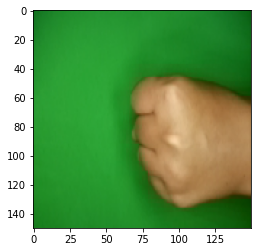

In [45]:
#import library numpy
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
# predicting images
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')